In [1]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr# Load the dataset
df = pd.read_csv('train - train.csv')


**Categorical Features:**
1. `blue` - Has Bluetooth or not
   - **Preprocessing:** No special preprocessing needed. Can be left as binary (0 or 1).

2. `dual_sim` - Has dual sim support or not
   - **Preprocessing:** No special preprocessing needed. Can be left as binary (0 or 1).

3. `four_g` - Has 4G or not
   - **Preprocessing:** No special preprocessing needed. Can be left as binary (0 or 1).

4. `three_g` - Has 3G or not
   - **Preprocessing:** No special preprocessing needed. Can be left as binary (0 or 1).

5. `touch_screen` - Has touch screen or not
   - **Preprocessing:** No special preprocessing needed. Can be left as binary (0 or 1).

6. `wifi` - Has wifi or not
   - **Preprocessing:** No special preprocessing needed. Can be left as binary (0 or 1).

**Numerical Features:**
1. `battery_power` - Total energy a battery can store in one time measured in mAh
2. `clock_speed` - The speed at which the microprocessor executes instructions
3. `fc` - Front Camera megapixels
4. `int_memory` - Internal Memory in Gigabytes
5. `m_dep` - Mobile Depth in cm
6. `mobile_wt` - Weight of mobile phone
7. `n_cores` - Number of cores of the processor
8. `pc` - Primary Camera megapixels
9. `px_height` - Pixel Resolution Height
10. `px_width` - Pixel Resolution Width
11. `ram` - Random Access Memory in Megabytes
12. `sc_h` - Screen Height of mobile in cm
13. `sc_w` - Screen Width of mobile in cm
14. `talk_time` - Longest time that a single battery charge will last when you are
   - **Preprocessing:** Scale the numerical features using StandardScaler to ensure all features have the same scale for modeling purposes.

**Target Variable:**
- `price_range` - This is the target variable with the value of:
   - 0 (low cost)
   - 1 (medium cost)
   - 2 (high cost)
   - 3 (very high cost)


### Handling Missing Values

Before proceeding with any analysis or modeling, it is essential to check for and handle any missing values in the dataset. Missing values can adversely affect the performance of machine learning models and lead to biased results. Here's how you can check for missing values and handle them:

#### Checking for Missing Values
To identify columns with missing values, we use the `isnull()` method to create a boolean DataFrame where missing values are marked as `True`, and then sum the number of missing values for each column. For example, if a column has missing values, the sum will be greater than 0.

#### Handling Strategies
1. **Imputation:** Replace missing values with a suitable value, such as the mean, median, or mode of the column. This method can help preserve the overall distribution of the data.
   
2. **Removal:** Remove rows or columns with missing values. This approach is suitable when the number of missing values is small compared to the total size of the dataset.

3. **Advanced Techniques:** For more complex scenarios, advanced imputation techniques such as K-Nearest Neighbors (KNN) or using predictive models to estimate missing values can be applied.

#### Conclusion
Handling missing values is a critical preprocessing step to ensure the integrity and reliability of the dataset for analysis and modeling purposes. The choice of strategy depends on the nature of the data and the impact of missing values on the analysis.


In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
fc            5
four_g        5
int_memory    5
m_dep         5
mobile_wt     4
n_cores       4
pc            5
px_height     4
px_width      2
ram           2
sc_h          1
sc_w          1
dtype: int64


In [4]:
#check if nulls are combined in rows, if so remoce complete row
# Print rows with missing values for each column
for column in missing_values[missing_values > 0].index:
    print(f"Rows with missing values in '{column}':")
    print(df[df[column].isnull()])
    print("\n")


Rows with missing values in 'fc':
     battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
157           1224     0          0.5         0 NaN     NaN         NaN   
158           1356     0          2.8         0 NaN     NaN         NaN   
261            728     0          2.7         1 NaN     NaN         NaN   
276           1662     0          0.5         0 NaN     NaN         NaN   
371           1011     0          1.1         0 NaN     NaN         NaN   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
157    NaN        NaN      NaN  ...      747.0     826.0   506.0  10.0   0.0   
158    NaN        NaN      NaN  ...     1612.0    1983.0  3702.0  17.0   0.0   
261    NaN        NaN      NaN  ...        NaN       NaN     NaN   5.0   1.0   
276    0.8      126.0      4.0  ...       32.0    1509.0  3760.0   9.0   5.0   
371    NaN        NaN      NaN  ...      481.0     749.0  2261.0   7.0   6.0   

     talk_time  three_g  touch_scr

Columns with Missing Values and Corresponding Indexes to Remove:

- 'fc', 'four_g', 'int_memory':
    - Indexes: 157, 158, 261, 276, 371

- 'm_dep':
    - Indexes: 157, 158, 217, 261, 371

- 'mobile_wt', 'n_cores':
    - Indexes: 157, 158, 261, 371

- 'pc':
    - Indexes: 157, 158, 261, 292, 293

- 'px_height':
    - Indexes: 261, 292, 293, 341

- 'px_width', 'ram':
    - Indexes: 261, 341

- 'sc_h', 'sc_w':
    - Index: 341

Explanation:
Since the number of rows with missing values for each column is relatively small compared to the size of the dataset, removing these rows is a reasonable approach. These rows can be removed without significantly affecting the overall dataset, especially that the null values are concentrated in specific rows 

only 9 rows were removes from 2000 which is negligable

In [5]:
df = df.dropna()

### Feature Engineering: Screen Characteristics

In this preprocessing step, we perform feature engineering to derive new features related to the screen characteristics of mobile devices. 

1. **Screen Area (`screen_area_cm2`):** By combining the screen height and width, we create a new feature representing the total screen area in square centimeters. This simplifies the dataset by condensing two related features into one, aiding in analysis and modeling.

2. **Aspect Ratio (`aspect_ratio`):** Calculated as the ratio of screen width to screen height, the aspect ratio provides insight into the shape of the screen (e.g., whether it's more square or rectangular), which can be relevant for certain types of analysis or user experience considerations.

3. **Overall Resolution (`px_area`):** The product of pixel height and pixel width, this feature represents the total number of pixels on the screen. It helps understand the display's clarity, detail, and overall resolution.

These engineered features enhance the dataset by providing more meaningful and easily interpretable representations of screen size, shape, and resolution, which can be valuable for subsequent analysis and modeling tasks.


In [6]:


# Combine screen height and screen width into screen area, aspect ratio,
df['screen_area_cm2'] = df['sc_h'] * df['sc_w']
df['aspect_ratio'] = df['sc_w'] / df['sc_h']
# Calculate overall resolution
df['px_area'] = df['px_height'] * df['px_width']

# Reasons for combining:
# 1. Simplification: Combining two related features into one can simplify analysis and modeling.
# 2. Meaningful representation: Screen area provides a more intuitive representation of display size than individual height and width measurements.
# 3. Easier visualization: Using a single variable for screen size can make it easier to visualize and interpret relationships with other variables.


### Preprocessing Explanation: Scaling Numerical Features

Scaling numerical features is a crucial preprocessing step in machine learning for several reasons:

1. **Improved Model Performance:** Many machine learning models perform better or converge faster when features are on a relatively similar scale. Scaling helps prevent features with large scales from dominating the learning process.

2. **Meaningful Comparisons:** Scaling ensures that the magnitude of a feature's value does not affect its impact on the model, allowing for more meaningful comparisons between features.

3. **Standardization with StandardScaler:** StandardScaler is a commonly used scaling technique that scales each feature to have a mean of 0 and a standard deviation of 1. This standardization helps to center the data around 0 and scale it to have a consistent variance.

Overall, scaling numerical features using StandardScaler helps prepare the data for machine learning models, leading to more stable and accurate model performance.


In [8]:
from sklearn.preprocessing import StandardScaler

# Specify the columns of interest
columns_of_interest = [ 'ram','battery_power','px_area','pc','aspect_ratio',  'fc', 'clock_speed',  'int_memory',
                       'screen_area_cm2', 'talk_time', 'm_dep', 'mobile_wt','n_cores']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the specified columns
df[columns_of_interest] = scaler.fit_transform(df[columns_of_interest])



### Box Plots of Features Grouped by Price Range

Box plots are used to visualize the distribution of numerical data and detect outliers. In this context, we create box plots for each specified feature, grouped by the price range of mobile devices.

#### Interpretation of Box Plots:
- **Box:** The box represents the interquartile range (IQR), with the bottom and top edges indicating the first (Q1) and third (Q3) quartiles, respectively. The length of the box represents the spread of the middle 50% of the data.
- **Whiskers:** The whiskers extend from the edges of the box to show the range of the data, excluding outliers. By default, they extend to 1.5 times the IQR from the quartiles.
- **Outliers:** Individual data points that fall outside the whiskers are considered outliers and are plotted as individual points.

#### Approach:
- For each specified feature, we create a subplot to visualize the box plot grouped by price range.
- We calculate the quartiles (Q1, Q3) and the interquartile range (IQR) for each price range group to identify outliers.
- Outliers are plotted as individual points outside the whiskers.
- The color of the outliers is set to red for better visibility.

#### Insights:
- The box plots help visualize the distribution of each feature across different price ranges, highlighting any differences or similarities in the feature values.
- Outliers are also visible, indicating extreme values that may require further investigation or preprocessing.

#### Conclusion:
- Box plots provide a comprehensive overview of the distribution of features and outliers across different price ranges, aiding in the analysis and understanding of the dataset.


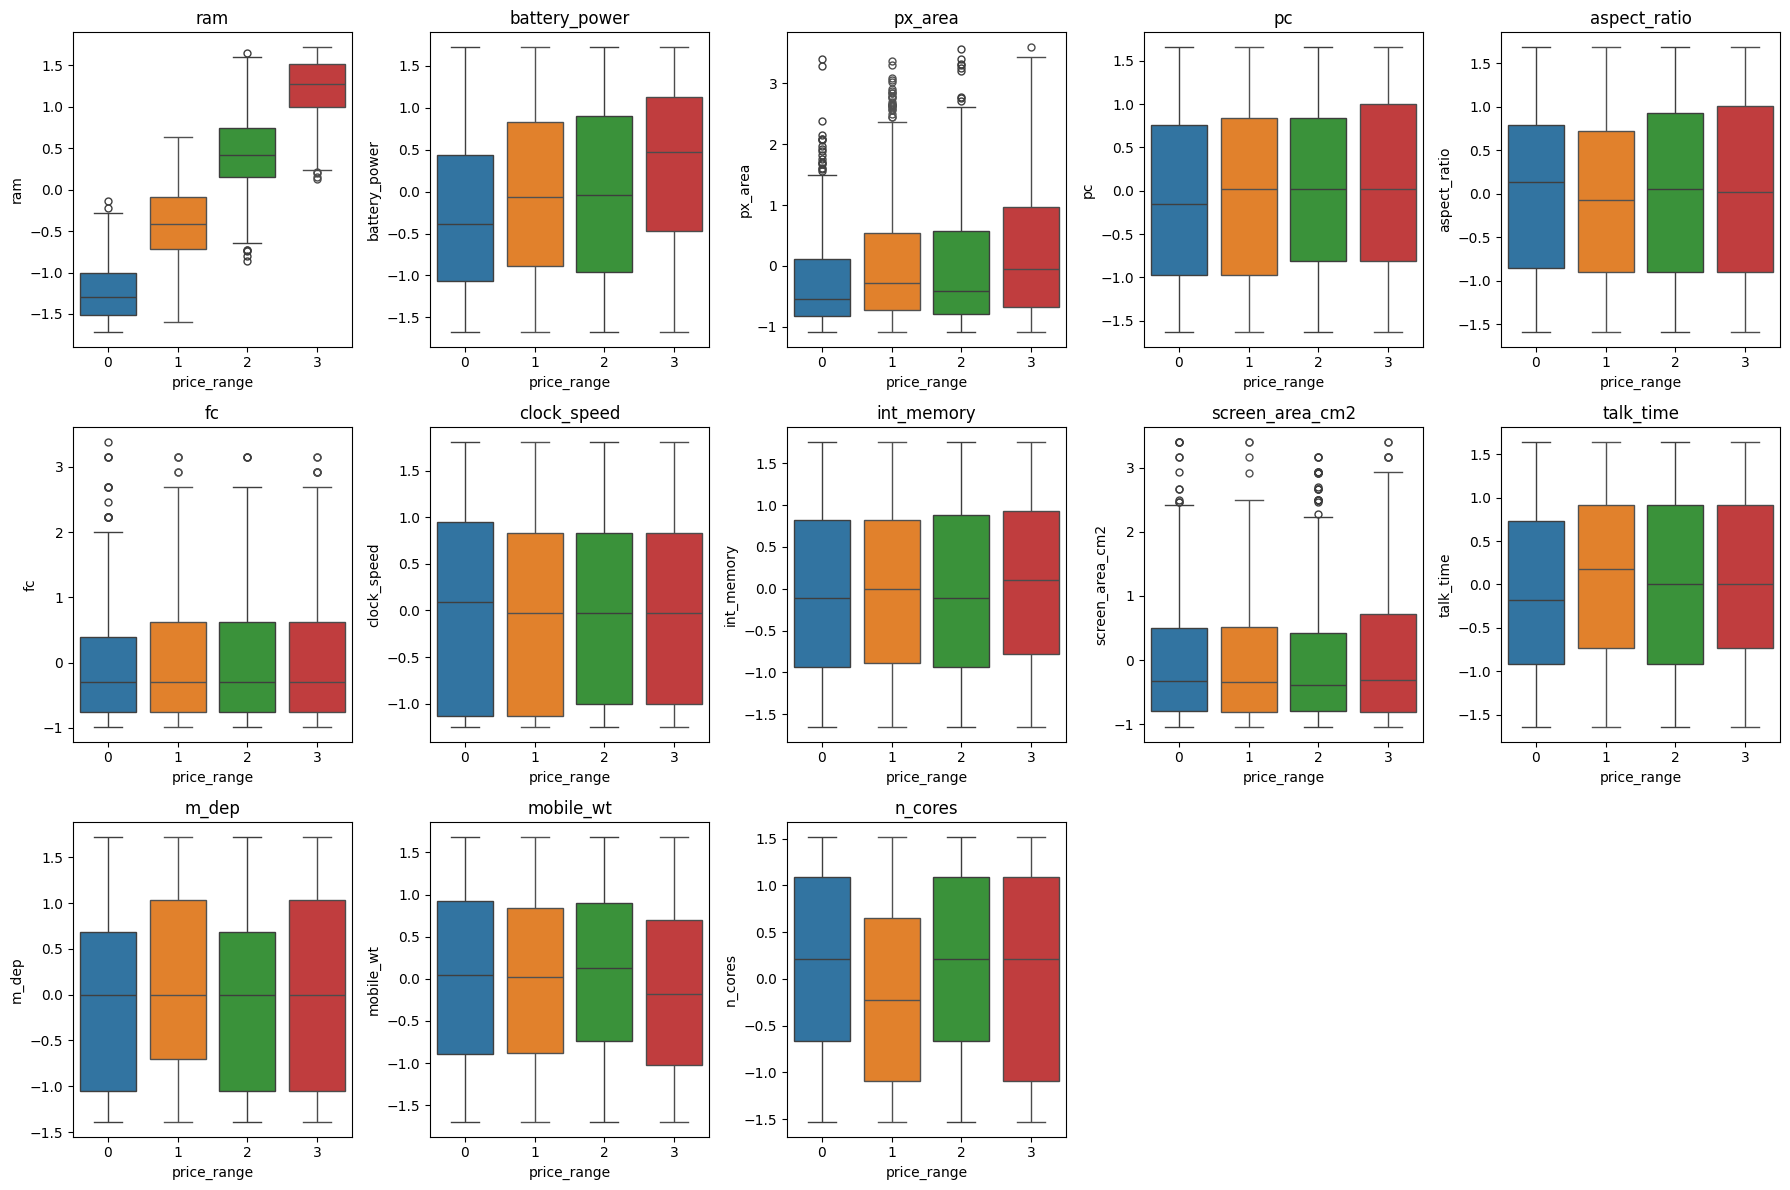

In [9]:
# Create box plots for each specified column, grouped by price_range
plt.figure(figsize=(18, 12))
num_plots = len(columns_of_interest)
num_rows = (num_plots // 5) + 1  # Determine number of rows needed

for i, column in enumerate(columns_of_interest):
    plt.subplot(num_rows, 5, i+1)
    for price_range, group_data in df.groupby('price_range'):
        Q1 = group_data[column].quantile(0.25)
        Q3 = group_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[(df['price_range'] == price_range) & (df[column] < lower_bound), column] = lower_bound
        df.loc[(df['price_range'] == price_range) & (df[column] > upper_bound), column] = upper_bound
        sns.boxplot(x='price_range', y=column, data=group_data, showfliers=True, flierprops=dict(marker='o', markersize=5, linestyle='none', color='red'))
    plt.title(column)

plt.tight_layout()
plt.show()


### Insights into Price Range Contributors

Based on the box plots and feature analysis, we can infer that the biggest contributor to the price range of mobile devices is the amount of RAM (`ram`). Devices with higher RAM capacities tend to be priced higher, indicating that RAM plays a significant role in determining the price range.

Following RAM, the next significant contributors to price range appear to be battery power (`battery_power`) and screen characteristics, specifically screen size (`screen_area_cm2`) and resolution (`px_area`). Devices with larger screen sizes and higher resolutions are generally priced higher, suggesting that display quality is an important factor in pricing decisions.

Other features such as primary camera resolution (`pc`), internal memory (`int_memory`), and number of processor cores (`n_cores`) also show some influence on price range, but to a lesser extent compared to RAM, battery power, and screen characteristics.

Overall, the amount of RAM, battery power, and screen size and resolution are key factors influencing the price range of mobile devices, highlighting the importance of these features in the consumer electronics market.


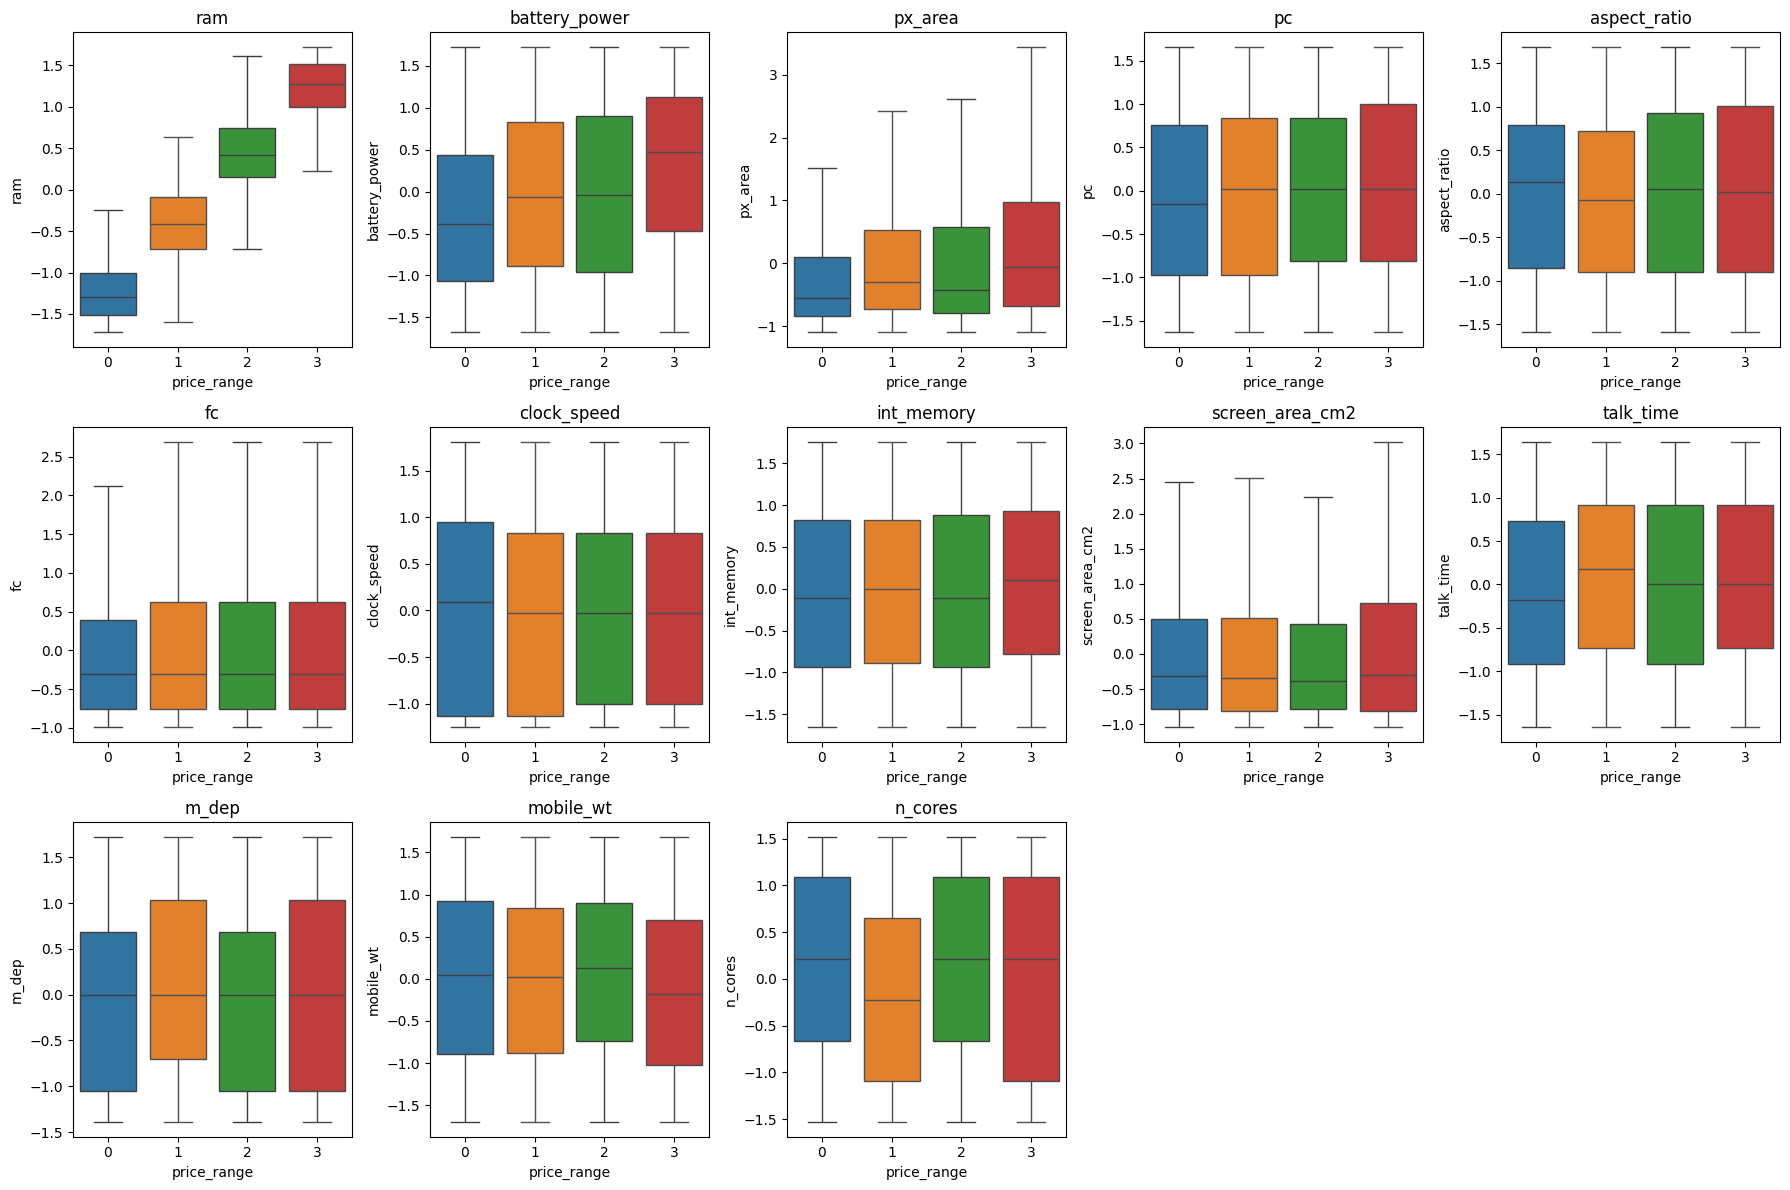

In [10]:
# Create box plots for each specified column, grouped by price_range
plt.figure(figsize=(18, 12))
num_plots = len(columns_of_interest)
num_rows = (num_plots // 5) + 1  # Determine number of rows needed

for i, column in enumerate(columns_of_interest):
    plt.subplot(num_rows, 5, i+1)
    for price_range, group_data in df.groupby('price_range'):
        #check removal of ouliers
        sns.boxplot(x='price_range', y=column, data=group_data, showfliers=True, flierprops=dict(marker='o', markersize=5, linestyle='none', color='red'))
    plt.title(column)

plt.tight_layout()
plt.show()


In a correlation matrix heatmap, it's common to use certain cutoff values to mask out values that are not considered significant. The typical cutoff values used are:

- **Strong correlation**: Values above 0.7 or below -0.7 are often considered to indicate a strong correlation.
- **Moderate correlation**: Values between 0.3 and 0.7 (or between -0.3 and -0.7) are considered to indicate a moderate correlation.
- **Weak correlation**: Values between 0 and 0.3 (or between 0 and -0.3) are considered to indicate a weak correlation.


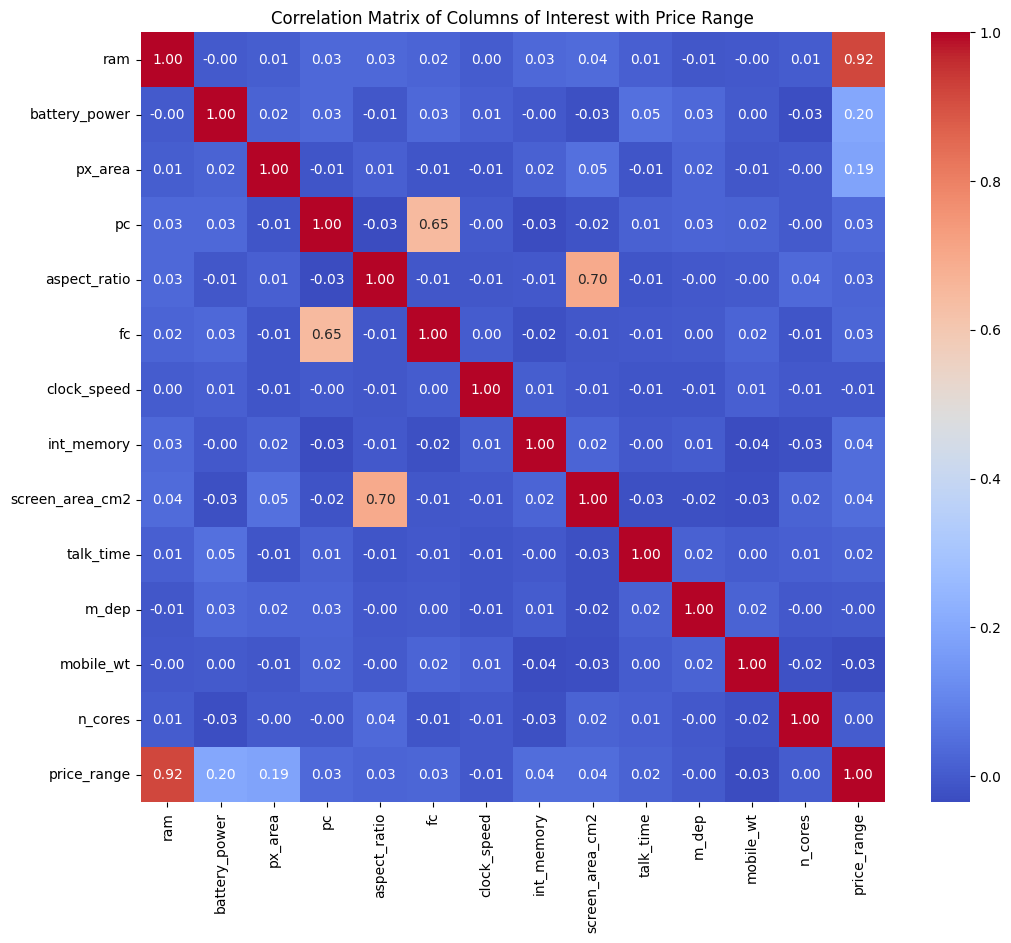

In [11]:
# Select the columns of interest and price_range
columns_of_interest = ['ram','battery_power','px_area','pc','aspect_ratio', 'fc', 'clock_speed', 'int_memory',
                       'screen_area_cm2', 'talk_time', 'm_dep', 'mobile_wt','n_cores', 'price_range']
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Columns of Interest with Price Range')
plt.show()

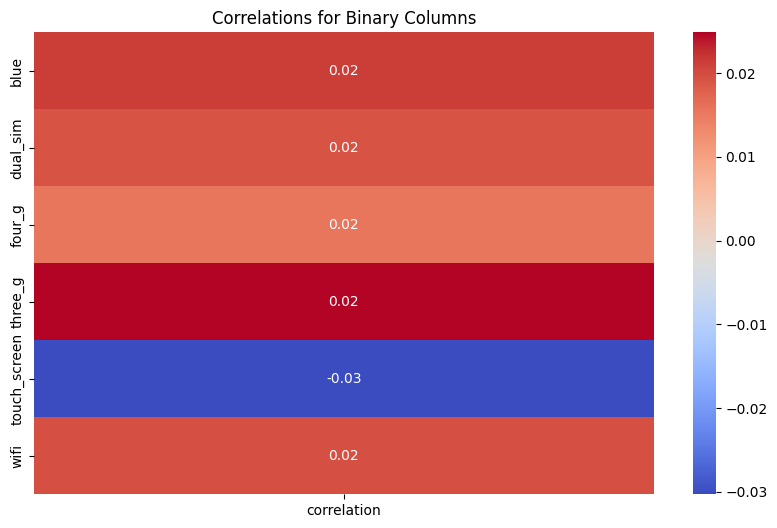

In [12]:

# Specify the binary columns of interest
binary_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Calculate the correlation using pointbiserialr
phi_coefficients = {}
for column in binary_columns:
    correlation, _ = pointbiserialr(df[column], df['price_range'])
    phi_coefficients[column] = correlation

# Create a DataFrame from the correlations
phi_df = pd.DataFrame.from_dict(phi_coefficients, orient='index', columns=['correlation'])

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(phi_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlations for Binary Columns')
plt.show()


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the two sets of variables for each model
model1_cols = ['ram', 'battery_power', 'px_area', 'pc', 'aspect_ratio', 'fc', 'clock_speed', 'int_memory',
               'screen_area_cm2', 'talk_time', 'm_dep', 'mobile_wt', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
model2_cols = ['ram', 'battery_power', 'px_area']

# Initialize the StandardScaler
scaler = StandardScaler()

# Split the dataset into features and target variable
X = df[model1_cols]
y = df['price_range']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and test model 1
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)

# Scale the features for model 2
X2 = df[model2_cols]
X_scaled2 = scaler.fit_transform(X2)

# Split the dataset into training and test sets for model 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y, test_size=0.2, random_state=42)

# Train and test model 2
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train2, y_train2)
y_pred_model2 = model2.predict(X_test2)

# Calculate performance metrics for each model
metrics_model1 = {
    'Accuracy': accuracy_score(y_test, y_pred_model1),
    'Precision': precision_score(y_test, y_pred_model1, average='weighted'),
    'Recall': recall_score(y_test, y_pred_model1, average='weighted'),
    'F1-score': f1_score(y_test, y_pred_model1, average='weighted')
}

metrics_model2 = {
    'Accuracy': accuracy_score(y_test2, y_pred_model2),
    'Precision': precision_score(y_test2, y_pred_model2, average='weighted'),
    'Recall': recall_score(y_test2, y_pred_model2, average='weighted'),
    'F1-score': f1_score(y_test2, y_pred_model2, average='weighted')
}

# Compare performance metrics in a table
comparison_df = pd.DataFrame({'Model 1': metrics_model1, 'Model 2': metrics_model2})
print(comparison_df)

            Model 1   Model 2
Accuracy   0.887218  0.914787
Precision  0.889377  0.916724
Recall     0.887218  0.914787
F1-score   0.887173  0.914338


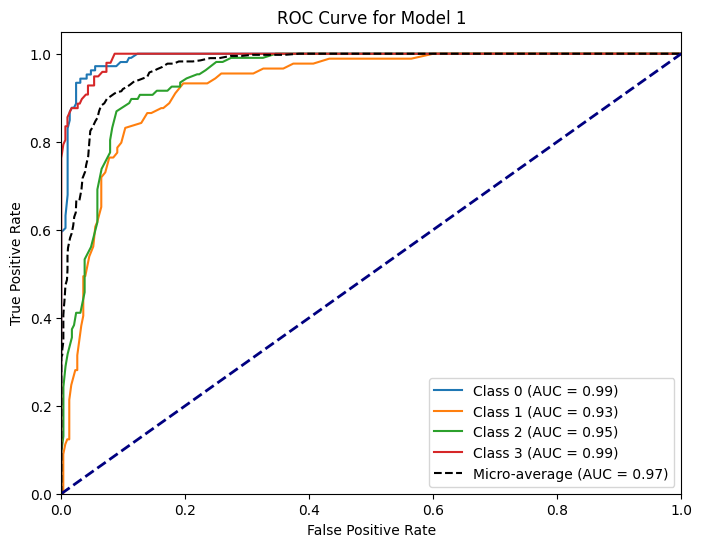

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df, scaler, model1_cols, and y are defined as before

# Split the dataset into features and target variable
X = df[model1_cols]

# Binarize the target variable
y_bin = label_binarize(y, classes=[0, 1, 2, 3])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

# Train and test model 1
model1 = RandomForestClassifier(random_state=42)
classifier = OneVsRestClassifier(model1)
y_score_model1 = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):  # assuming there are 4 classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score_model1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_score_model1.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = {:.2f})'.format(roc_auc_micro), linestyle='--', color='black')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model 1')
plt.legend(loc="lower right")
plt.show()



In [20]:
!pip install --upgrade scikit-learn


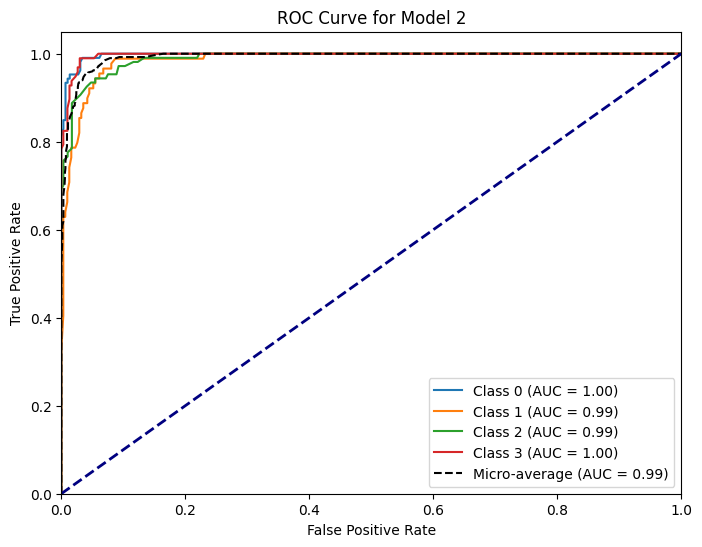

In [35]:

# Split the dataset into features and target variable
X = df[model2_cols]

# Binarize the target variable
y_bin = label_binarize(y, classes=[0, 1, 2, 3])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

# Train and test model 1
model1 = RandomForestClassifier(random_state=42)
classifier = OneVsRestClassifier(model1)
y_score_model1 = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):  # assuming there are 4 classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score_model1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_score_model1.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = {:.2f})'.format(roc_auc_micro), linestyle='--', color='black')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model 2')
plt.legend(loc="lower right")
plt.show()

